<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/object-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [4]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

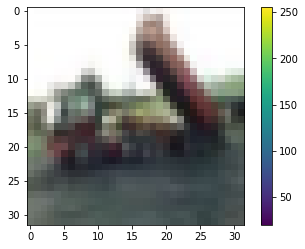

In [5]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)

plt.show()

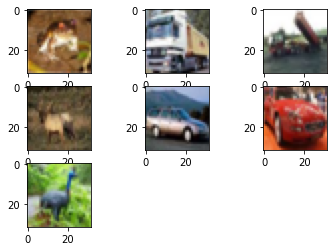

In [6]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [7]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        #tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        #tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#history = model.fit(X_train, y_train, epochs=20,batch_size = 32) #validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5512 - accuracy: 0.4323 - val_loss: 1.3400 - val_accuracy: 0.5188
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2411 - accuracy: 0.5581 - val_loss: 1.1435 - val_accuracy: 0.5856
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1028 - accuracy: 0.6082 - val_loss: 1.0435 - val_accuracy: 0.6313
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0130 - accuracy: 0.6415 - val_loss: 0.9963 - val_accuracy: 0.6533
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9334 - accuracy: 0.6703 - val_loss: 0.9919 - val_accuracy: 0.6465
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8752 - accuracy: 0.6918 - val_loss: 0.9499 - val_accuracy: 0.6640
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8258 - accuracy: 0.7088 - val_loss: 0.9220 -

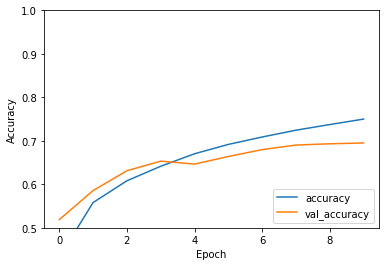

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [13]:
datagen.fit(X_train)

In [14]:

history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4795 - accuracy: 0.4749 - val_loss: 1.0232 - val_accuracy: 0.6496
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4176 - accuracy: 0.4966 - val_loss: 1.1622 - val_accuracy: 0.5974
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3810 - accuracy: 0.5070 - val_loss: 1.1034 - val_accuracy: 0.6132
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.3674 - accuracy: 0.5150 - val_loss: 1.0932 - val_accuracy: 0.6150
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.3436 - accuracy: 0.5209 - val_loss: 1.1254 - val_accuracy: 0.6006
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.3308 - accuracy: 0.5241 - val_loss: 1.0631 - val_accuracy: 0.6224
Epoch 7/10
1563/1563 [==========================

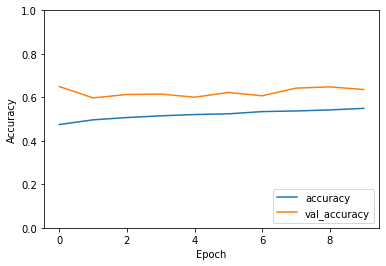

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')